In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

In [5]:
df = pd.read_csv('modified_diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,unknown,78.0,0,1,never,101.665015,6.6,140,0
1,Female,NaN,0,0,No Info,28.034572,6.6,80,0
2,Male,28.0,0,0,NaN,25.369152,5.7,9999,0
3,Female,37.0,0,0,yes,25.262602,NaN,155,0
4,Male,75.0,1,1,current,23.212811,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99996,Female,-1.0,0,0,No Info,18.624383,6.5,100,0
99997,Male,70.0,0,0,former,27.804892,5.7,155,0
99998,Female,23.0,0,0,never,35.913652,4.0,100,0
99999,Female,54.0,0,0,current,21.607675,6.6,90,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100001 non-null  object 
 1   age                  99999 non-null   float64
 2   hypertension         100001 non-null  int64  
 3   heart_disease        100001 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100001 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100001 non-null  int64  
 8   diabetes             100001 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [9]:
print(df.isnull().sum())

gender                 0
age                    2
hypertension           0
heart_disease          0
smoking_history        1
bmi                    0
HbA1c_level            1
blood_glucose_level    0
diabetes               0
dtype: int64


In [11]:
df = df.dropna()
df = df.drop_duplicates()
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,unknown,78.0,0,1,never,101.665015,6.6,140,0
4,Male,75.0,1,1,current,23.212811,4.8,155,0
5,Female,16.0,0,0,never,28.156373,6.6,85,0
6,Female,46.0,0,0,never,16.546449,6.5,200,1
7,Female,82.0,0,0,No Info,25.621355,5.7,85,0
...,...,...,...,...,...,...,...,...,...
99995,Female,81.0,0,0,No Info,27.505580,6.2,90,0
99996,Female,-1.0,0,0,No Info,18.624383,6.5,100,0
99997,Male,70.0,0,0,former,27.804892,5.7,155,0
99998,Female,23.0,0,0,never,35.913652,4.0,100,0


In [13]:
df = df[(df['age'] > 0) & (df['age'] <= 120)]
df = df[(df['bmi'] >= 10) & (df['bmi'] <= 70)]
df = df[(df['blood_glucose_level'] >= 50) & (df['blood_glucose_level'] <= 300)]
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
4,Male,75.0,1,1,current,23.212811,4.8,155,0
5,Female,16.0,0,0,never,28.156373,6.6,85,0
6,Female,46.0,0,0,never,16.546449,6.5,200,1
7,Female,82.0,0,0,No Info,25.621355,5.7,85,0
8,Male,41.0,0,0,never,33.590574,4.8,145,0
...,...,...,...,...,...,...,...,...,...
99994,Female,38.0,0,0,No Info,22.011588,4.8,145,0
99995,Female,81.0,0,0,No Info,27.505580,6.2,90,0
99997,Male,70.0,0,0,former,27.804892,5.7,155,0
99998,Female,23.0,0,0,never,35.913652,4.0,100,0


In [15]:
df['gender'] = df['gender'].str.lower()
df['smoking_history'] = df['smoking_history'].str.lower()
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
4,male,75.0,1,1,current,23.212811,4.8,155,0
5,female,16.0,0,0,never,28.156373,6.6,85,0
6,female,46.0,0,0,never,16.546449,6.5,200,1
7,female,82.0,0,0,no info,25.621355,5.7,85,0
8,male,41.0,0,0,never,33.590574,4.8,145,0
...,...,...,...,...,...,...,...,...,...
99994,female,38.0,0,0,no info,22.011588,4.8,145,0
99995,female,81.0,0,0,no info,27.505580,6.2,90,0
99997,male,70.0,0,0,former,27.804892,5.7,155,0
99998,female,23.0,0,0,never,35.913652,4.0,100,0


In [17]:
print("Unique values in gender column:", df['gender'].unique())

Unique values in gender column: ['male' 'female' 'other']


In [19]:
other_count = (df['gender'] == 'other').sum()
other_percentage = (other_count / len(df)) * 100
print(f"تعداد 'gender': {other_count}")
print(f"درصد 'gender': {other_percentage:.2f}%")

تعداد 'gender': 18
درصد 'gender': 0.02%


In [21]:
df = df[(df['gender'] == 'male') | (df['gender'] == 'female')]

In [23]:
print("Unique values in smoking_history column:", df['smoking_history'].unique())

no_info_count = (df['smoking_history'] == 'no info').sum()
no_info_percentage = (no_info_count / len(df)) * 100
print(f"تعداد 'no info': {no_info_count}")
print(f"درصد 'no info': {no_info_percentage:.2f}%")

Unique values in smoking_history column: ['current' 'never' 'no info' 'former' 'ever' 'not current']
تعداد 'no info': 34049
درصد 'no info': 34.76%


In [25]:
mode_values = df['smoking_history'].mode()

if mode_values[0] == 'no info' and len(mode_values) > 1:
    mode_value = mode_values[1]
else:
    mode_value = mode_values[0]
df['smoking_history'] = df['smoking_history'].replace('no info', mode_value)

df

C:\Users\EleComp\AppData\Local\Temp\ipykernel_152\2156812466.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_history'] = df['smoking_history'].replace('no info', mode_value)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
4,male,75.0,1,1,current,23.212811,4.8,155,0
5,female,16.0,0,0,never,28.156373,6.6,85,0
6,female,46.0,0,0,never,16.546449,6.5,200,1
7,female,82.0,0,0,never,25.621355,5.7,85,0
8,male,41.0,0,0,never,33.590574,4.8,145,0
...,...,...,...,...,...,...,...,...,...
99994,female,38.0,0,0,never,22.011588,4.8,145,0
99995,female,81.0,0,0,never,27.505580,6.2,90,0
99997,male,70.0,0,0,former,27.804892,5.7,155,0
99998,female,23.0,0,0,never,35.913652,4.0,100,0


In [27]:
print("Unique values in smoking_history column:", df['smoking_history'].unique())

Unique values in smoking_history column: ['current' 'never' 'former' 'ever' 'not current']


In [29]:
df.loc[:, 'gender'] = df['gender'].map({'male': 1, 'female': 0})

df.loc[:, 'smoking_history'] = df['smoking_history'].map({
    'current': 1, 
    'ever': 2,
    'not current': 2,  
    'former': 2,
    'never': 3
})
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
4,1,75.0,1,1,1,23.212811,4.8,155,0
5,0,16.0,0,0,3,28.156373,6.6,85,0
6,0,46.0,0,0,3,16.546449,6.5,200,1
7,0,82.0,0,0,3,25.621355,5.7,85,0
8,1,41.0,0,0,3,33.590574,4.8,145,0
...,...,...,...,...,...,...,...,...,...
99994,0,38.0,0,0,3,22.011588,4.8,145,0
99995,0,81.0,0,0,3,27.505580,6.2,90,0
99997,1,70.0,0,0,2,27.804892,5.7,155,0
99998,0,23.0,0,0,3,35.913652,4.0,100,0


In [31]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,1.0,0.892755,1.0,1.0,0.0,0.224053,0.236364,0.340909
1,0.0,0.189704,0.0,0.0,1.0,0.307937,0.563636,0.022727
2,0.0,0.547188,0.0,0.0,1.0,0.110935,0.545455,0.545455
3,0.0,0.976168,0.0,0.0,1.0,0.264922,0.400000,0.022727
4,1.0,0.487607,0.0,0.0,1.0,0.400147,0.236364,0.295455
...,...,...,...,...,...,...,...,...
97960,0.0,0.451859,0.0,0.0,1.0,0.203670,0.236364,0.295455
97961,0.0,0.964252,0.0,0.0,1.0,0.296894,0.490909,0.045455
97962,1.0,0.833174,0.0,0.0,0.5,0.301973,0.400000,0.340909
97963,0.0,0.273117,0.0,0.0,1.0,0.439566,0.090909,0.090909


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
k_neighbors = list(range(5, 51, 5))
scores = []

for k in k_neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    score = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    scores.append(score.mean())

optimal_k_neighbors = k_neighbors[np.argmax(scores)]
print(f"بهترین مقدار k: {optimal_k_neighbors}")

بهترین مقدار k: 5


In [37]:
knn = KNeighborsClassifier(n_neighbors=optimal_k_neighbors, n_jobs=-1)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [39]:
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    return [accuracy, precision, recall, f1]

Metrics for KNN:
Accuracy: 0.9523
Precision: 0.9500
Recall: 0.9523
F1 Score: 0.9465



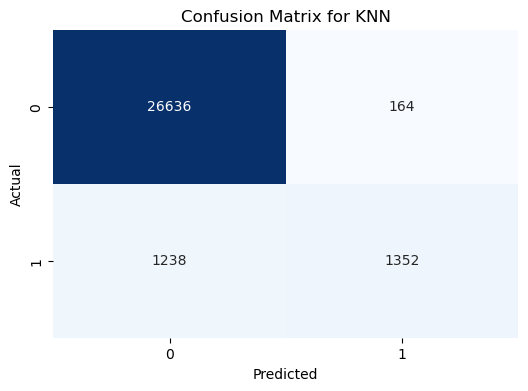

Metrics for Decision Tree:
Accuracy: 0.9513
Precision: 0.9525
Recall: 0.9513
F1 Score: 0.9519



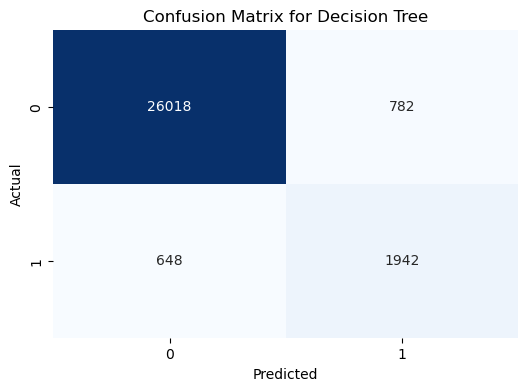

In [41]:
metrics_knn=evaluate_model(y_test, y_pred_knn, model_name='KNN')
metrics_dt=evaluate_model(y_test, y_pred_dt, model_name='Decision Tree')

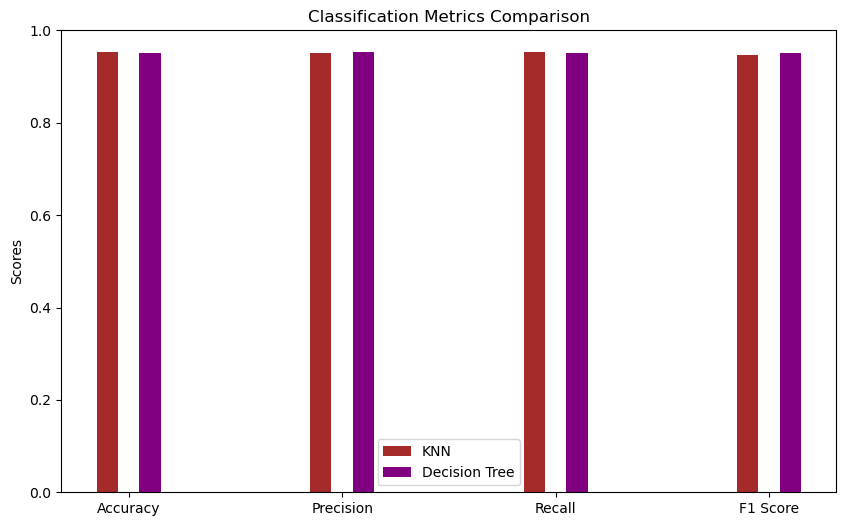

In [43]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
x = np.arange(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(x - 0.1, metrics_knn, width=0.1, label='KNN', color='brown')
plt.bar(x + 0.1, metrics_dt, width=0.1, label='Decision Tree', color='purple')

plt.xticks(x, labels)
plt.ylabel('Scores')
plt.title('Classification Metrics Comparison')
plt.legend()
plt.show()

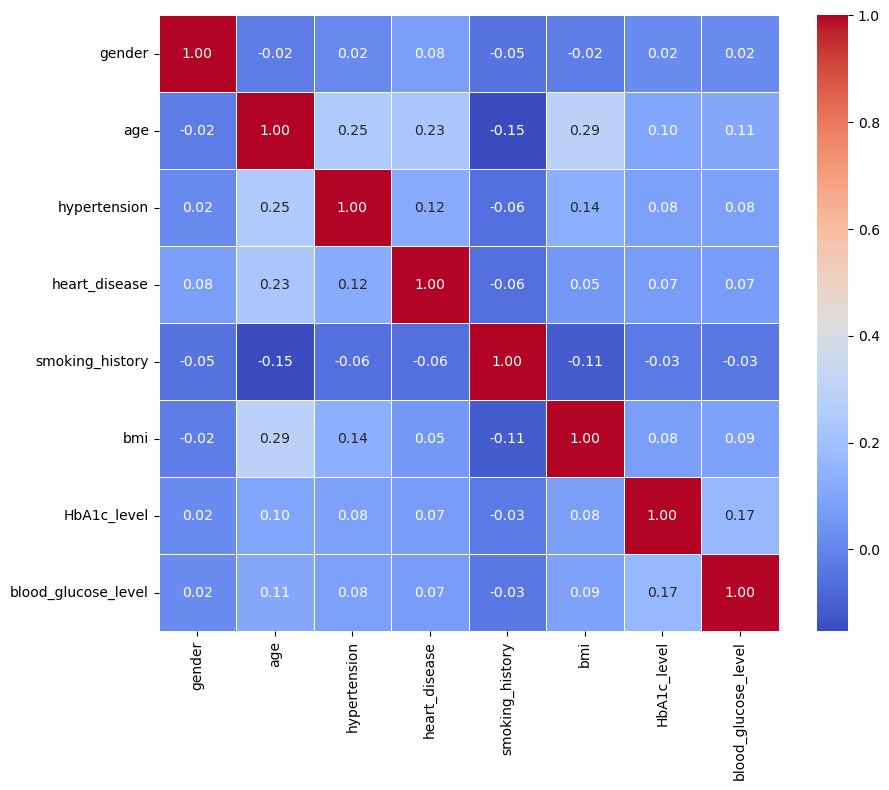

In [45]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [47]:
features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
X = df[features]

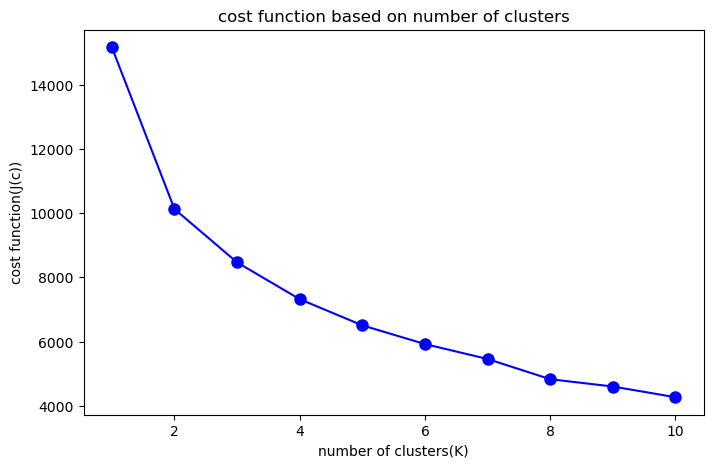

In [49]:
k_clusters = range(1, 11)  
cost_values = []
for k in k_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)  
    cost_values.append(kmeans.inertia_) 

plt.figure(figsize=(8, 5))
plt.plot(k_clusters, cost_values, 'bo-', markersize=8)
plt.xlabel('number of clusters(K)')
plt.ylabel('cost function(J(c))')
plt.title('cost function based on number of clusters')
plt.show()

In [51]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca = X_pca[:2000, :]

C:\Users\EleComp\AppData\Local\Temp\ipykernel_152\140838467.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['K-Meeans-Cluster'] = kmeans_labels


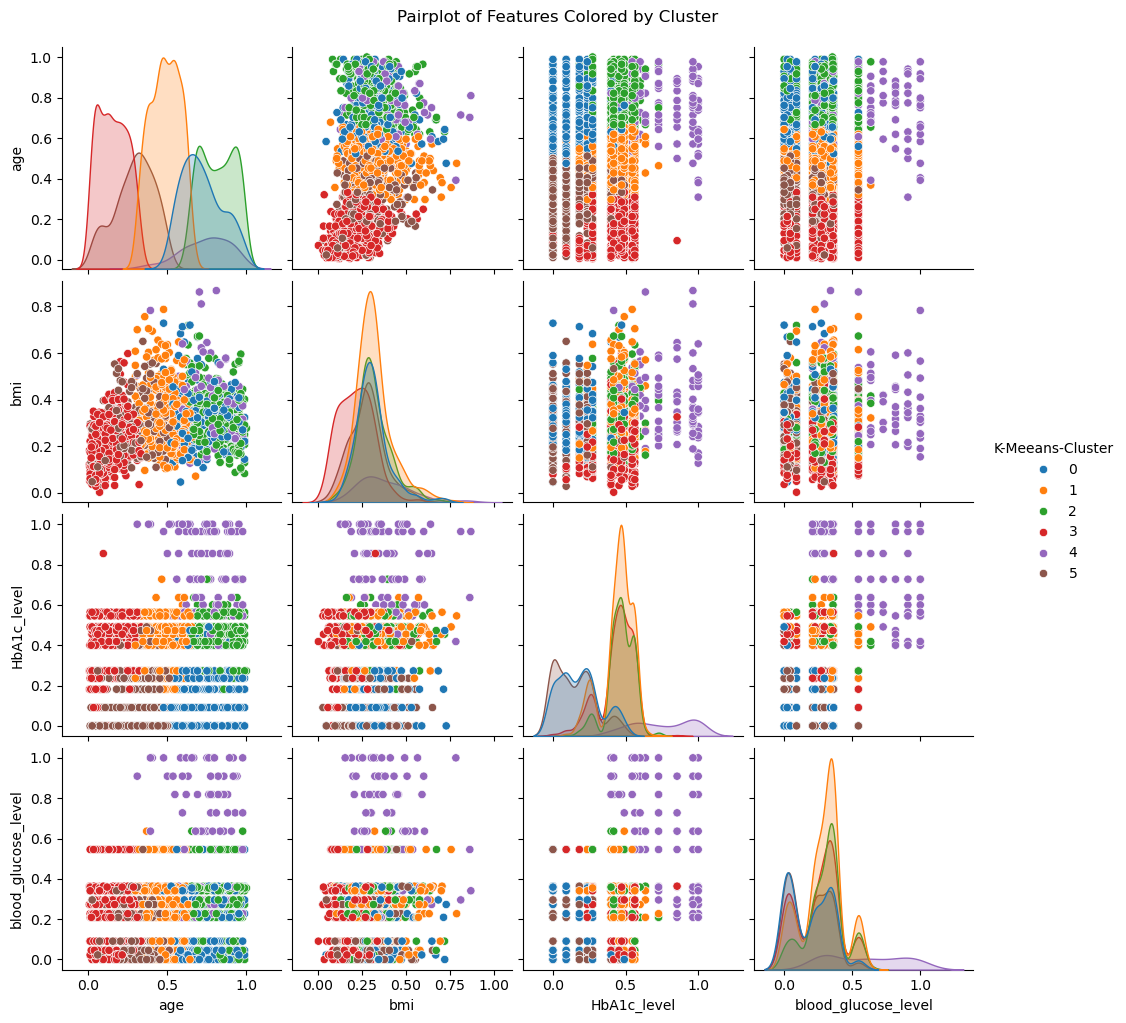

In [53]:
optimal_k_clusters_kmeans = 6

kmeans = KMeans(n_clusters=optimal_k_clusters_kmeans, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)
df = df.iloc[:2000, :]
df['K-Meeans-Cluster'] = kmeans_labels

sns.pairplot(df, hue='K-Meeans-Cluster', palette='tab10', vars=features)
plt.suptitle('Pairplot of Features Colored by Cluster', y=1.02)
plt.show()

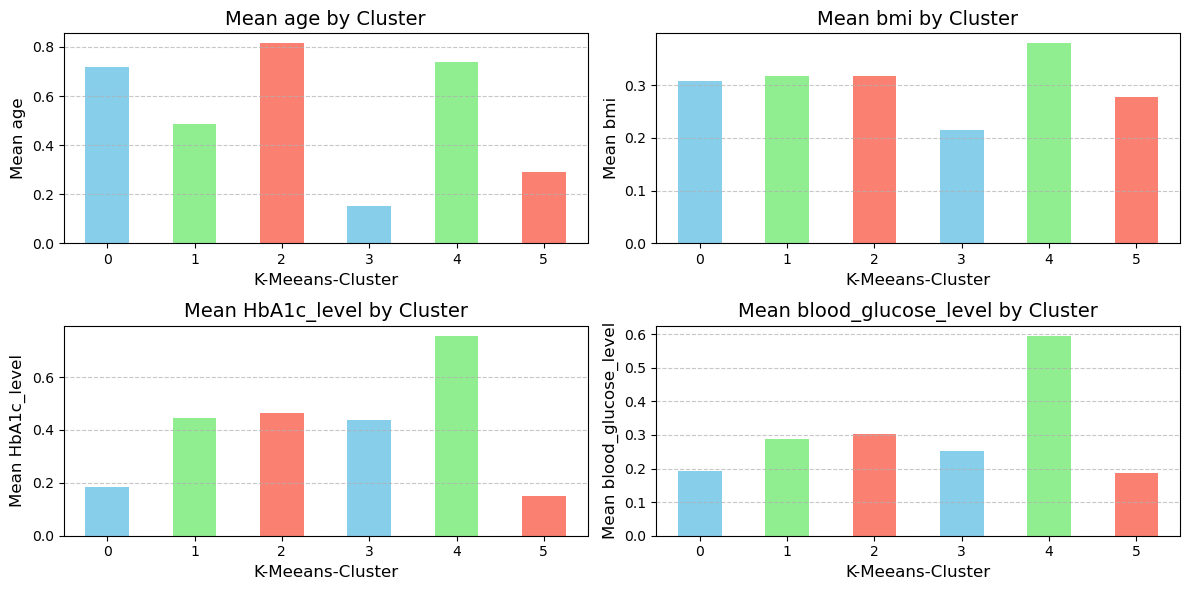

In [54]:
cluster_means = df.groupby('K-Meeans-Cluster')[features].mean()

plt.figure(figsize=(12, 6))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1) 
    cluster_means[feature].plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
    plt.title(f'Mean {feature} by Cluster', fontsize=14)
    plt.xlabel('K-Meeans-Cluster', fontsize=12)
    plt.ylabel(f'Mean {feature}', fontsize=12)
    plt.xticks(rotation=0) 
    plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.tight_layout()
plt.show()

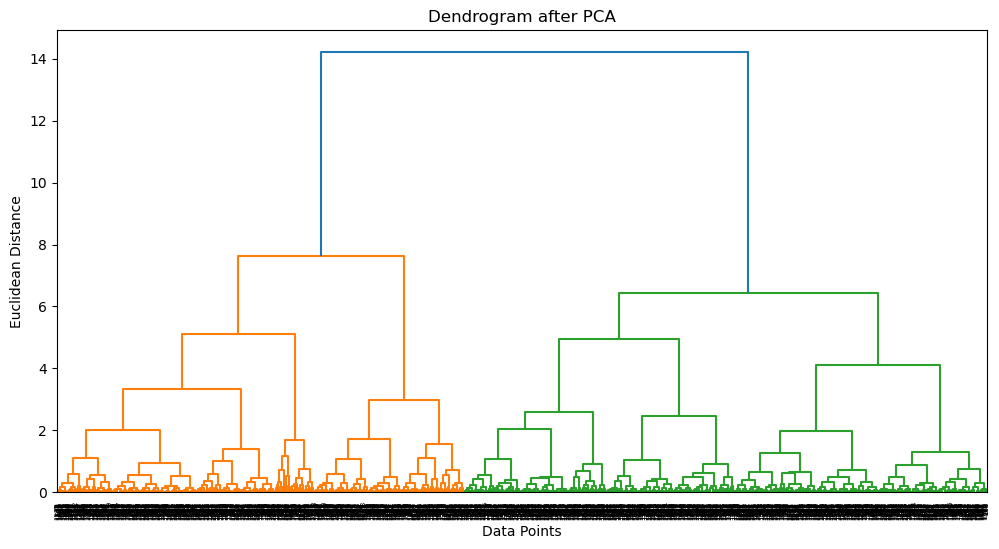

In [55]:
Z_pca = linkage(X_pca, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(Z_pca, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram after PCA')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [58]:
optimal_k_clusters_agglo = 6
agglo = AgglomerativeClustering(n_clusters=optimal_k_clusters_agglo)
agglo_labels = agglo.fit_predict(X_pca)

df = df.iloc[:2000, :] 
df['Agglo-Cluster'] = agglo_labels 
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,K-Meeans-Cluster,Agglo-Cluster
0,1.0,0.892755,1.0,1.0,0.0,0.224053,0.236364,0.340909,2,2
1,0.0,0.189704,0.0,0.0,1.0,0.307937,0.563636,0.022727,3,5
2,0.0,0.547188,0.0,0.0,1.0,0.110935,0.545455,0.545455,1,1
3,0.0,0.976168,0.0,0.0,1.0,0.264922,0.400000,0.022727,0,2
4,1.0,0.487607,0.0,0.0,1.0,0.400147,0.236364,0.295455,1,0
...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.023832,0.0,0.0,1.0,0.046813,0.000000,0.295455,5,3
1996,0.0,0.618684,0.0,0.0,1.0,0.338828,0.418182,0.209091,1,1
1997,1.0,0.018589,0.0,0.0,1.0,0.196043,0.236364,0.209091,3,5
1998,1.0,0.797426,0.0,0.0,1.0,0.362762,0.000000,0.359091,0,2


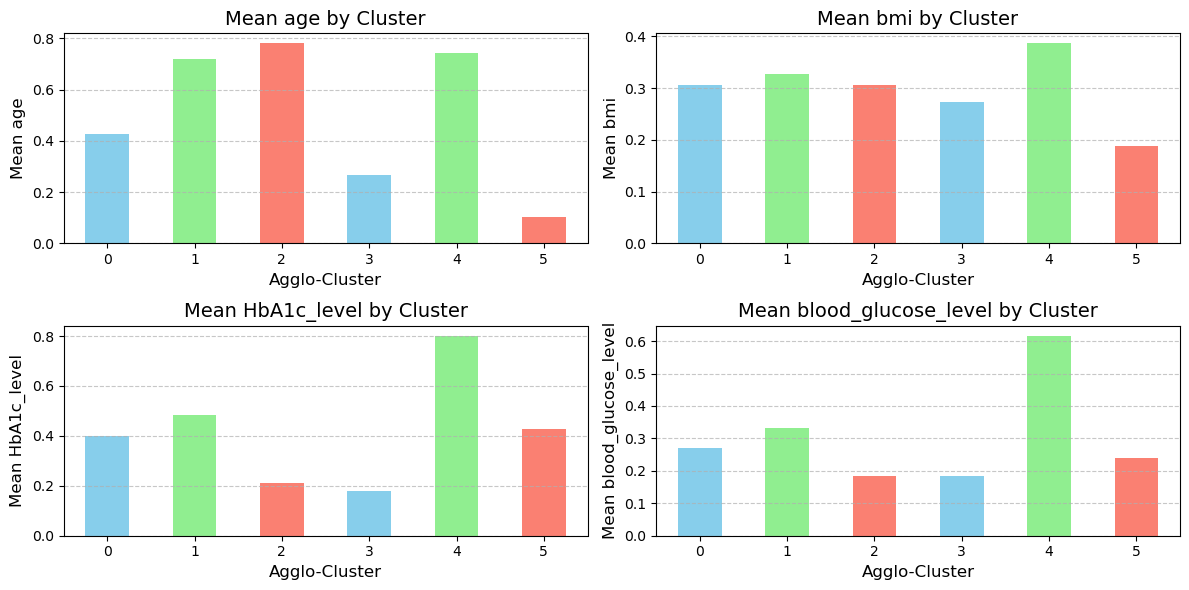

In [61]:
cluster_Agglomerative = df.groupby('Agglo-Cluster')[features].mean()

plt.figure(figsize=(12, 6))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1) 
    cluster_Agglomerative[feature].plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
    plt.title(f'Mean {feature} by Cluster', fontsize=14)
    plt.xlabel('Agglo-Cluster', fontsize=12)
    plt.ylabel(f'Mean {feature}', fontsize=12)
    plt.xticks(rotation=0) 
    plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.tight_layout()
plt.show()

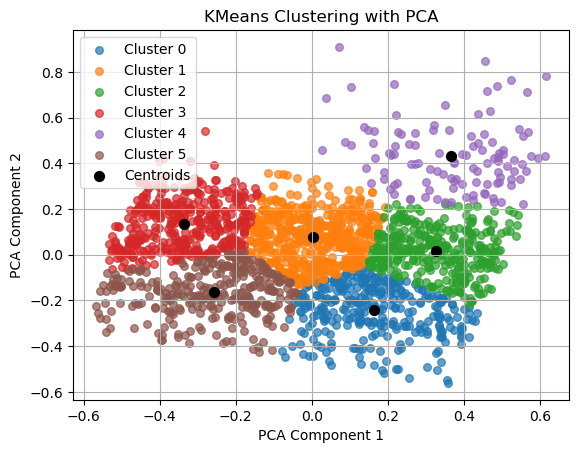

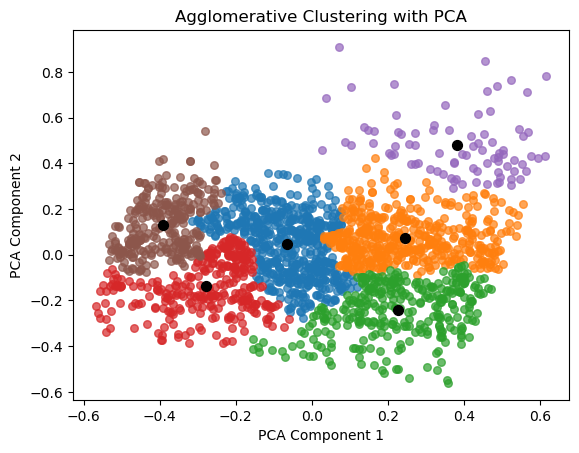

Silhouette Score for KMeans: 0.35
Silhouette Score for Agglomerative Clustering: 0.30


In [63]:
for cluster in range(optimal_k_clusters_kmeans):
    plt.scatter(X_pca[kmeans_labels == cluster, 0], X_pca[kmeans_labels == cluster, 1], 
                label=f'Cluster {cluster}', alpha=0.7, s=30)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='.', label='Centroids')
plt.title('KMeans Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

for cluster in range(optimal_k_clusters_agglo):
    plt.scatter(X_pca[agglo_labels == cluster, 0], X_pca[agglo_labels == cluster, 1], 
                label=f'Cluster {cluster}', alpha=0.7, s=30)

centroids_agglo = []
for cluster in range(optimal_k_clusters_agglo):
    cluster_points = X_pca[agglo_labels == cluster]
    centroid = cluster_points.mean(axis=0) 
    centroids_agglo.append(centroid)

centroids_agglo = np.array(centroids_agglo)

plt.scatter(centroids_agglo[:, 0], centroids_agglo[:, 1], s=200, c='black', marker='.', label='Centroids')
plt.title('Agglomerative Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2') 
plt.show()

silhouette_kmeans = silhouette_score(X_pca, kmeans_labels)
print(f'Silhouette Score for KMeans: {silhouette_kmeans:.2f}')

silhouette_agglo = silhouette_score(X_pca, agglo_labels)
print(f'Silhouette Score for Agglomerative Clustering: {silhouette_agglo:.2f}')